In [120]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import math
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal

import the data

In [121]:
train=pd.read_csv("./data/Train.csv")
test=pd.read_csv("./data/Test.csv")
sample_sub=pd.read_csv("./data/sample_sub.csv")

In [122]:
train.head()


,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [123]:
train.precip[2]

'0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.051,0.936,0.612,0.204,3.112,0.595,0.017,0.782,0.289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8039999999999985,0.0,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.034,0.017,0.017,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0'

In [124]:
# covert features  from string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
        
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])
    test[feature]=test[feature].apply(lambda x: [ replace_nan(X)  for X in x.replace("nan"," ").split(",")])    

In [125]:
len(train.precip[2])


121

## Analysis of the nan values

### stats

In [126]:
list_columns = ['temp', 'precip', 'rel_humidity', 'wind_dir', 'wind_spd', 'atmos_press']

In [127]:
def count_nan(row):
    counter = 0
    if isinstance(row, type(list())):
        for x in row:
            if np.isnan(x):
                counter += 1
        return counter 
    else: return np.nan
    
for col in list_columns:
    train['nan_' + str(col)] = round(train[col].apply(count_nan))

In [128]:
train.drop(list_columns, axis=1).head()

,ID,location,target,nan_temp,nan_precip,nan_rel_humidity,nan_wind_dir,nan_wind_spd,nan_atmos_press
0,ID_train_0,C,45.126304,105,105,105,105,105,105
1,ID_train_1,D,79.131702,0,0,0,0,0,0
2,ID_train_10,A,32.661304,1,1,1,46,46,1
3,ID_train_100,A,53.850238,0,0,0,51,51,0
4,ID_train_1000,A,177.418750,91,91,91,91,91,91


- heat map nan values:


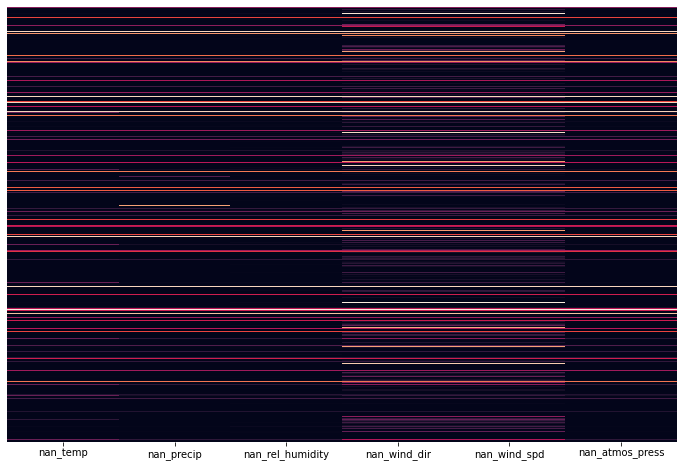

In [129]:
list_columns = list_columns+ ['location', 'target']
plt.figure(figsize=(12, 8))
sns.heatmap(train.drop(list_columns + ['ID'], axis=1), cbar=False,yticklabels=False)
plt.show()

percentage of missing values

In [130]:
# 
data_nan = train.drop(list_columns, axis=1)

In [131]:
data_nan['sum'] = round(data_nan.sum(axis=1, numeric_only=True)/726*100,2)
data_nan.shape

(15539, 8)

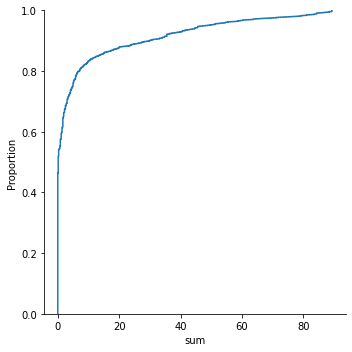

In [132]:
from seaborn_qqplot import pplot
sns.displot(data_nan, x = data_nan['sum'], kind="ecdf") 

In [133]:
for i in [90, 80, 70, 60, 50, 40]:
    print('{:.2%} observation contains more than {}% of missing values'
                .format(data_nan[(data_nan['sum']>i)].ID.count()/15539, i))

0.00% observation contains more than 90% of missing values
1.70% observation contains more than 80% of missing values
2.48% observation contains more than 70% of missing values
3.29% observation contains more than 60% of missing values
4.76% observation contains more than 50% of missing values
7.05% observation contains more than 40% of missing values


In [134]:
data_nan[(data_nan['sum']>50)].shape


(739, 8)

the observation with more than 50% nan values can be removed for training. It represents less than 5% of the data

In [135]:
print('without outliers remain {} observations'.format(data_nan[(data_nan['sum']<=1)].ID.count()))


without outliers remain 8960 observations


In [136]:
data_nan[(data_nan['sum']<=1)]

,ID,nan_temp,nan_precip,nan_rel_humidity,nan_wind_dir,nan_wind_spd,nan_atmos_press,sum
1,ID_train_1,0,0,0,0,0,0,0.00
6,ID_train_10001,0,0,0,0,0,0,0.00
10,ID_train_10005,0,0,1,2,2,0,0.69
11,ID_train_10006,0,0,0,0,0,0,0.00
12,ID_train_10007,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...
15532,ID_train_9993,0,0,0,0,0,0,0.00
15533,ID_train_9994,0,0,0,1,1,0,0.28
15536,ID_train_9997,1,0,1,0,0,0,0.28
15537,ID_train_9998,0,0,0,0,0,0,0.00


- how does it look the target of the values with 50% of nan values?

(739, 16)

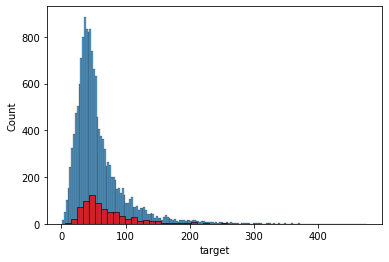

In [137]:
target_w_50nan = train.join(data_nan['sum'])[(train.join(data_nan['sum'])['sum']>50)]
sns.histplot(train.target)
sns.histplot(target_w_50nan.target, color='red')

target_w_50nan.shape

the observation with more than 50% of nan values are well represented over all range of the target. it is ok to remove them

- remove observation with more than 50% nan values

In [138]:
train.join(data_nan['sum'])
train.shape

(15539, 15)

In [139]:
data_process = train.join(data_nan['sum'])[(train.join(data_nan['sum'])['sum']<50)]
data_process.shape

(14800, 16)

- remove outliers

In [140]:
list_columns = ['temp', 'precip', 'rel_humidity', 'wind_dir', 'wind_spd', 'atmos_press']
def count_nan(row):
    counter = 0
    if isinstance(row, type(list())):
        for x in row:
            if np.isnan(x):
                counter += 1
        return counter 
    else: return np.nan
    
for col in list_columns:
    train['nan_' + str(col)] = round(train[col].apply(count_nan))
data_nan = train.drop(list_columns, axis=1)

data_nan['sum'] = round(data_nan.sum(axis=1, numeric_only=True)/726*100,2)
data_nan.shape

(15539, 10)

In [141]:
data_nan.head()

,ID,location,target,nan_temp,nan_precip,nan_rel_humidity,nan_wind_dir,nan_wind_spd,nan_atmos_press,sum
0,ID_train_0,C,45.126304,105,105,105,105,105,105,92.99
1,ID_train_1,D,79.131702,0,0,0,0,0,0,10.90
2,ID_train_10,A,32.661304,1,1,1,46,46,1,17.72
3,ID_train_100,A,53.850238,0,0,0,51,51,0,21.47
4,ID_train_1000,A,177.418750,91,91,91,91,91,91,99.64


In [142]:
data_wo_outlier = train.join(data_nan['sum'])[(train.join(data_nan['sum'])['sum']<50)]
data_wo_outlier.shape

(14536, 16)

### Precipitation
precip: total rainfall in mm recorded at the site over the hour (mm)

In [143]:
precipitation = pd.DataFrame(data_process[['precip', 'nan_precip']])
precipitation.head()

,precip,nan_precip
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0
2,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...",1
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...",0
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [144]:
# removing the nan values and show the remain values
def mean_without_nan(row):
    new_row = []
    for x in row: 
        if np.isnan(x): pass
        else: new_row.append(x)
    return np.mean(new_row)

In [145]:
precipitation['mean_without_nan'] = precipitation['precip'].apply(mean_without_nan)

In [146]:
precipitation.head()

,precip,nan_precip,mean_without_nan
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0,0.007025
2,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...",1,0.151767
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...",0,1.127273
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.572736
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.057628


- how many observations contain nan values?

In [147]:
print ('{:.2%} observations contains nan values'.format( 
    precipitation[(precipitation['nan_precip'] != 0)].precip.count()/precipitation.shape[0]))

14.37% observations contains nan values


distribution of the amount of nan values

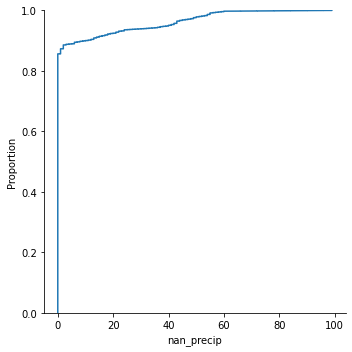

In [148]:
from seaborn_qqplot import pplot
sns.displot(precipitation, x = precipitation['nan_precip'], kind="ecdf") 

intensive look into the observations without nan values

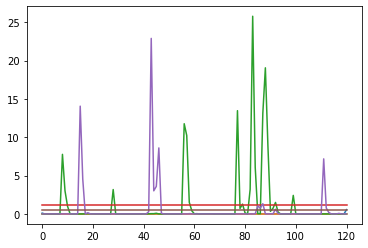

In [149]:
for observ in precipitation[(precipitation['nan_precip'] == 0)].precip[:3]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.mean(observ))
    

the mean value leaveras to much the observation
all observations has to be taken into account

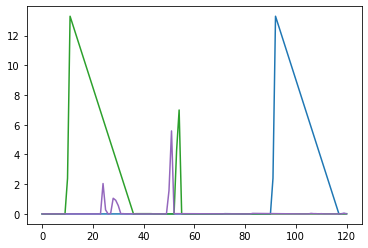

In [150]:
for observ in precipitation[(precipitation['nan_precip'] > 40)].precip[:3]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.mean(observ))

nan values can be taken as mean

for data preprocessing precipitation: 
- changing nan values to the mean precipitation for each observation

In [151]:
def fill_nan_in_row(row):
    # calculate the mean ignoring nan values
    mean = round(np.nanmean(row),2)
    new_row = []
    for x in row: 
        if np.isnan(x):
            new_row.append(mean)
        else: 
            new_row.append(x)
    return new_row

In [152]:
precipitation['precip_fill'] = precipitation['precip'].apply(fill_nan_in_row)
precipitation.head()

,precip,nan_precip,mean_without_nan,precip_fill
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0,0.007025,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0..."
2,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...",1,0.151767,"[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...",0,1.127273,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,..."
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.572736,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.057628,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Temperatur

In [153]:
temperatur = pd.DataFrame(data_process[['temp', 'nan_temp']])
temperatur.head()

,temp,nan_temp
1,"[22.53333333, 21.71666667, 20.83333333, 20.983...",0
2,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....",1
3,"[22.96666667, 24.26666667, 25.275, 25.625, 25....",0
5,"[26.225, 26.25, 26.95833333, 27.925, 28.416666...",0
6,"[21.86666667, 21.38333333, 20.75, 20.74166667,...",0


In [154]:
print ('{:.2%} observations contains nan values'.format( 
    temperatur[(temperatur['nan_temp'] != 0)].temp.count()/temperatur.shape[0]))

16.57% observations contains nan values


- look into the distribution of the observation without nan values

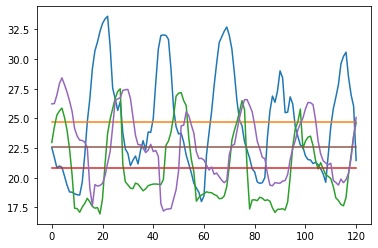

In [155]:
# have a look into the temp data

for observ in temperatur[(temperatur['nan_temp'] == 0)].temp[:3]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.mean(observ))
    

    

There are cycle trends in the temperatur features and 
the temperatur cycles are in different points 

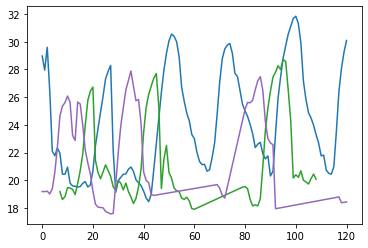

In [156]:
for observ in temperatur[(temperatur['nan_temp'] != 0)].temp[:3]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.mean(observ))
    
    

- for data preparation the reduction of the temperatur by doing maen average

In [157]:
def mean(row):
    return np.nanmean(row)
    
temperatur['temp_mean'] = temperatur['temp'].apply(mean)

- rolling mean

In [158]:
t_roll = pd.DataFrame(temperatur[(temperatur['nan_temp'] != 0)].temp[:3])
list(t_roll.index)

[2, 17, 19]

In [159]:
# .interpolate()

In [160]:
#for observ in temperatur[(temperatur['nan_temp'] != 0)].temp[:3]:
obs = [pd.DataFrame(x) for x in temperatur[(temperatur['nan_temp'] != 0)].temp[1:3]]
t = pd.concat(obs, axis = 1, keys=list(t_roll.index))
t.tail()


,2,17
,0,0
116,NaN,NaN
117,NaN,18.800000
118,NaN,18.383333
119,NaN,18.408333
120,NaN,18.441667


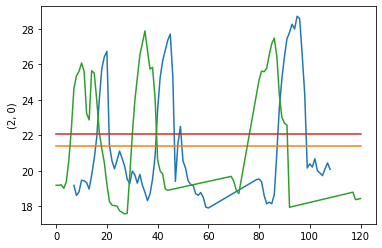

In [161]:
for col in t.columns:
    sns.lineplot(y = t[col], x = range(0,len(t)))
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(t[col]))


- filling with rolling mean

In [162]:
for col in t.columns:
    print (col)
    t[col].fillna(t[col].rolling(24).mean(), inplace=True)
t

(2, 0)
(17, 0)


,2,17
,0,0
0,NaN,19.191667
1,NaN,19.183333
2,NaN,19.216667
3,NaN,19.016667
4,NaN,19.391667
...,...,...
116,NaN,NaN
117,NaN,18.800000
118,NaN,18.383333


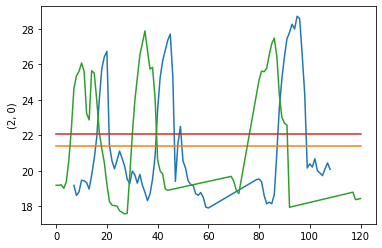

In [163]:
#

for col in t.columns:
    sns.lineplot(y = t[col], x = range(0,len(t)))
    sns.lineplot(x=[i for i in range(0, len(t))] ,y=np.nanmean(t[col]))

In [164]:
t.tail()

,2,17
,0,0
116,NaN,NaN
117,NaN,18.800000
118,NaN,18.383333
119,NaN,18.408333
120,NaN,18.441667


<AxesSubplot:xlabel='temp_mean', ylabel='Count'>

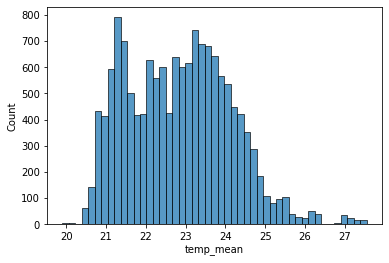

In [165]:
sns.histplot(temperatur.temp_mean)

In [166]:
temperatur[(temperatur['temp_mean']<19)].shape

(0, 3)

- outliers?
have a look into the  mean temperatur lower than 20  ~61 observations
lower than 19 ~43 observation
   -> maybe remove them

In [167]:
temperatur[(temperatur['temp_mean']<20)]

for observ in temperatur[(temperatur['temp_mean']<19)].temp:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    #sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(observ))

this observation seems to be related.

- for data preparation the reduction of the temperatur by doing maen average
- or reduction for temperatur for day

### relative humidity

In [168]:
humidity = pd.DataFrame(train.rel_humidity)


In [169]:
# count nan values in each row
def count_nan(row):
    counter = 0
    for x in row:
        if np.isnan(x):
            counter += 1
    return counter 

humidity['count_nan'] = round(humidity['rel_humidity'].apply(count_nan))
humidity.head()
        

,rel_humidity,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[0.744583333, 0.808083333, 0.911166667, 0.9163...",0
2,"[0.573333333, 0.597166667, 0.5668333329999999,...",1
3,"[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...",0
4,"[0.8564166670000001, 0.874916667, 0.879833333,...",91


In [170]:
# look into data

humidity_wo_nan = humidity[(humidity['count_nan']== 0)]
humidity_wo_nan.rel_humidity[:3]


1    [0.744583333, 0.808083333, 0.911166667, 0.9163...
3    [0.8430833329999999, 0.79025, 0.7375, 0.728, 0...
5    [0.7566666670000001, 0.7090833329999999, 0.632...
Name: rel_humidity, dtype: object

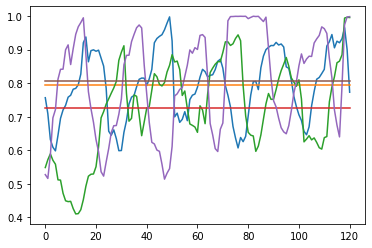

In [171]:

for observ in humidity[(humidity['count_nan']== 0)].rel_humidity[2:5]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(observ))

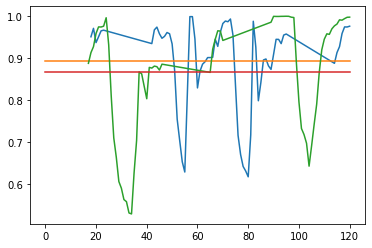

In [172]:

for observ in humidity[(humidity['count_nan']> 50)&(humidity['count_nan']< 60)].rel_humidity[2:4]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)
    sns.lineplot(x=[i for i in range(len(observ))] ,y=np.nanmean(observ))

- rolling mean

In [173]:
humidity.head()

,rel_humidity,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[0.744583333, 0.808083333, 0.911166667, 0.9163...",0
2,"[0.573333333, 0.597166667, 0.5668333329999999,...",1
3,"[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...",0
4,"[0.8564166670000001, 0.874916667, 0.879833333,...",91


In [174]:
type(humidity.rel_humidity[0])

list

In [175]:
def rolling(row):
    new_row = pd.Series(row)
    new_row.fillna(new_row.rolling(24).mean(), inplace=True)
    return new_row.to_list()



In [176]:
humidity['hum_wo_nan'] = humidity['rel_humidity'].apply(rolling)

### wind direction

In [177]:
wind = pd.DataFrame(train.wind_dir)



In [178]:
wind['count_nan'] = round(wind['wind_dir'].apply(count_nan))

In [179]:
wind.head()

,wind_dir,count_nan
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105
1,"[281.6643101, 89.15629262, 81.96853891, 291.01...",0
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",46
3,"[300.0850574, 293.6769595, 294.5174647, 301.92...",51
4,"[21.83997432, 17.05405341, 89.26406044, 123.58...",91


look into data without nan values

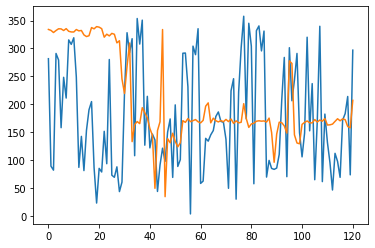

In [180]:
for observ in wind[(wind['count_nan'] ==0 )].wind_dir[:2]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)

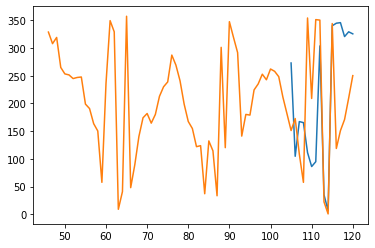

In [181]:
for observ in wind[(wind['count_nan'] !=0 )].wind_dir[:2]:
    sns.lineplot(x=[i for i in range(len(observ))] ,y=observ)

In [182]:
def convert_vector(row):
    new_row = []
    rad = []
    for x in row: 
        rad.append(x*np.pi/180)
    
    for r in rad: 
        wx = round(np.cos(r),2)
        wy = round(np.sin(r),2)
        new_row.append([wx,wy])
    return new_row
    

In [183]:
wind['vec'] = wind.wind_dir.apply(convert_vector)

In [184]:
wind.head()

,wind_dir,count_nan,vec
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",105,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan..."
1,"[281.6643101, 89.15629262, 81.96853891, 291.01...",0,"[[0.2, -0.98], [0.01, 1.0], [0.14, 0.99], [0.3..."
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",46,"[[nan, nan], [nan, nan], [nan, nan], [nan, nan..."
3,"[300.0850574, 293.6769595, 294.5174647, 301.92...",51,"[[0.5, -0.87], [0.4, -0.92], [0.41, -0.91], [0..."
4,"[21.83997432, 17.05405341, 89.26406044, 123.58...",91,"[[0.93, 0.37], [0.96, 0.29], [0.01, 1.0], [-0...."


for x in wind.vec[1][:3]:

In [185]:


xs = [x[0] for x in wind.vec[1][:3]]

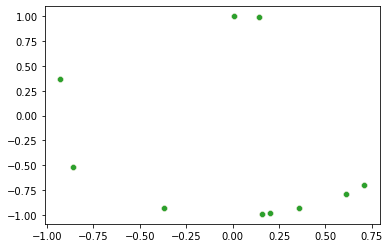

In [186]:
for x in wind.vec[1][:3]:
    if x[0] != np.nan:
        sns.scatterplot(x=[x[0] for x in wind.vec[1][:10]],
                 y=[x[1] for x in wind.vec[1][:10]])

### target
do we see trend?

In [187]:
target = pd.DataFrame(train.target)

<AxesSubplot:ylabel='target'>

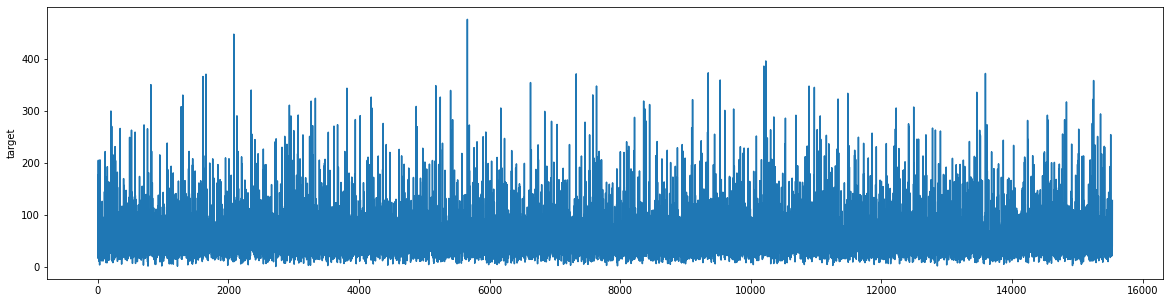

In [188]:
plt.figure(figsize= (20,5))
sns.lineplot(x=target.index, y = target.target)

- discover cycles

In [189]:
# detrend series

def diff_series(ts, interval=1):
    """
    Differences a time series by a certain lag.
    
        Args:
        ts: array of 1d time series
        
        Returns:
        Differenced time series
    """
    diff = ts[interval:] - ts[:-interval]
    return diff


y_diff = diff_series(target.values,24)

In [190]:
def plot_ts(ts = None, ts_add = None, title ='Time Series', legend=['1']):
    """
    Plots one or two time series in a single plot
    
        Args:
        ts: 1d- or 2d-array of time series. Dimension
            must be (n,) or (n,2)
        title: Title for the time plot.
        legend: list of legend names. If empty no legend.
        
        Returns:
        matplotlib plot object
    """
    plt.figure(figsize=(10, 4))
    plt.plot(ts[:,], color='orange')
    plt.grid(True,axis='y')
    plt.title(title)
    if ts_add is not None:
        plt.plot(ts_add, color='blue')
    if len(legend) > 0:
        plt.legend(legend)
    plt.show()

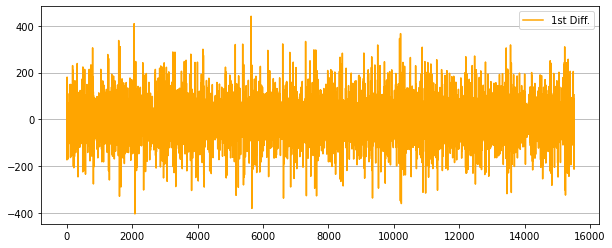

In [191]:
# Detrend the series
plot_ts(y_diff, title = '', legend=['1st Diff.'])

In [192]:
from scipy import signal

# We use for the sampling frequency 1 as we want to
# discover cycles over the original time steps.
f, Pxx = signal.periodogram(y_diff, fs = 1, window='boxcar', scaling='spectrum')
#plt.plot(f, Pxx, color = 'orange')
#plt.title('Periodogram')
#plt.show();
f

array([0.])

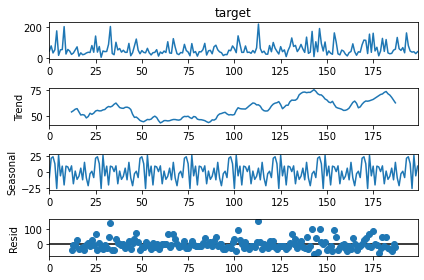

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Clutter-free version of the plot
#1. Compute
seas_decomp_yearly = seasonal_decompose(
    x=target['target'][:200], 
    model='additive', 
    two_sided=True,
    period= 24)

#2. Plot

fig= seas_decomp_yearly.plot()

- grid search for seasonality 

- how good is the data for the largest target values?

In [194]:
above_350 = train[(train['target']>350)]
above_350

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,nan_temp,nan_precip,nan_rel_humidity,nan_wind_dir,nan_wind_spd,nan_atmos_press
813,ID_train_10729,C,"[20.31666667, 20.44166667, 20.325, 20.01666667...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.88425, 0.859083333, 0.90475, 0.934166667, 0...","[175.4970919, 208.340072, 279.18336989999995, ...","[0.309166667, 0.308333333, 0.3775, 0.345833333...","[87.76166667, 87.72666667, 87.66583333, 87.617...",350.437917,0,0,1,0,0,0
1611,ID_train_11447,C,"[22.73333333, 20.95833333, 17.78333333, 18.058...","[0.0, 0.629, 0.6459999999999999, 0.0, 0.017, 0...","[0.7095, 0.773833333, 0.896833333, 0.939333333...","[137.33288149999998, 25.73490787, 357.2235515,...","[0.3675, 0.990833333, 1.089166667, 0.370833333...","[87.7, 87.79583333, 87.81833333, 87.87833333, ...",366.063958,0,0,0,0,0,0
1657,ID_train_11489,C,"[21.23333333, 21.05, 20.45833333, 20.39166667,...","[0.0, 0.0, 0.0, 0.0, 2.774, 12.919, 1.02, 1.19...","[0.901666667, 0.9225, 0.930833333, 0.955833333...","[167.8206971, 169.5665424, 145.1419528, 155.80...","[0.465, 0.3725, 0.36, 0.358333333, 0.4, 0.7375...","[87.84666667, 87.84416667, 87.84083333, 87.809...",370.530652,0,0,0,0,0,0
2083,ID_train_11872,A,"[19.6, 19.56666667, 19.5, 19.15833333, 19.1583...","[0.119, 0.0, 0.017, 0.017, 0.017, 3.539, 1.224...","[0.996916667, 0.999583333, 0.999333333, 0.9992...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.24916667, 88.31583333, 88.36083333, 88.439...",447.340000,0,0,1,43,43,0
5660,ID_train_15091,C,"[22.875, 22.4, 22.03333333, 21.65833333, 21.47...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.991...","[0.818333333, 0.869166667, 0.893333333, 0.9066...","[152.4033876, 153.8179515, 162.5017315, 157.26...","[0.583333333, 0.505833333, 0.5975, 0.465833333...","[87.69166667, 87.765, 87.85416667, 87.865, 87....",475.820000,0,0,0,22,22,0
6627,ID_train_1978,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",354.460208,19,19,19,19,19,19
7327,ID_train_2607,C,"[22.03333333, 21.65833333, 21.475, 21.475, 21....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.991, 1.376999...","[0.893333333, 0.906666667, 0.926666667, 0.9283...","[162.5017315, 157.2675485, 167.2736821, 170.74...","[0.5975, 0.465833333, 0.6525, 0.80083333299999...","[87.85416667, 87.865, 87.85833333, 87.85416667...",371.130000,0,0,0,22,22,0
9349,ID_train_4427,C,"[20.86666667, 20.79166667, 20.6, 20.50833333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.017, 0.0, 0.0, 0.0...","[0.900666667, 0.91575, 0.936, 0.941583333, 0.9...","[170.4978756, 172.2459429, 153.3469238, 142.78...","[0.8916666670000001, 0.9825, 0.495, 0.3875, 0....","[87.85666667, 87.88666667, 87.93083333, 87.930...",373.133542,0,0,0,0,0,0
9532,ID_train_4592,C,"[21.25833333, 20.68333333, 20.25833333, 20.083...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.835, 0.8773333329999999, 0.895416667, 0.904...","[174.0836604, 176.0309589, 165.5548876, 173.07...","[0.781666667, 0.4241666670000001, 0.311666667,...","[87.8425, 87.88416667, 87.90333333, 87.9641666...",359.334091,0,0,0,0,0,0
10201,ID_train_5194,C,"[21.14166667, 20.86666667, 20.79166667, 20.6, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017, 0.0, 0.0...","[0.887083333, 0.900666667, 0.91575, 0.936, 0.9...","[170.9168624, 170.4978756, 172.2459429, 153.34...","[1.025833333, 0.8916666670000001, 0.9825, 0.49...","[87.83, 87.85666667, 87.88666667, 87.93083333,...",386.051020,0,0,0,0,0,0
